In [1]:
import actionet
import actionet.preprocessing
import actionet.tools
import scipy
import numpy as np
import scanpy as sc
import anndata
import pandas as pd
from anndata import AnnData

import matplotlib.pyplot as plt

In [ ]:
adata = anndata.read_h5ad("../data/test_adata.h5ad")

In [ ]:
adata = actionet.preprocessing.filter_anndata(adata, min_cells_per_feat=0.01, inplace=False)

adata.layers['logcounts'] = sc.pp.normalize_total(adata, target_sum=1e4, inplace=False)['X']
sc.pp.log1p(adata, layer='logcounts', base=2, copy=False)

In [ ]:
actionet.reduce_kernel(adata, n_components=30, layer='logcounts', key_added='action', inplace=True)

In [ ]:
adata2 = actionet.run_actionet(adata, k_max=30, layer='logcounts', inplace=False)

In [ ]:
labels = adata2.obs['CellLabel'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata2.obsm['umap_2d_actionet'][:, 0],
    y=adata2.obsm['umap_2d_actionet'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()

In [ ]:
actionet.run_actionet(adata, k_max=30, layer='logcounts', inplace=True)

In [ ]:
labels = adata.obs['CellLabel'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap_2d_actionet'][:, 0],
    y=adata.obsm['umap_2d_actionet'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()

In [6]:
adata = anndata.read_h5ad("../../perturbseq_pipeline/data/objects/GW3/seq101.seq101_1.2025_10_29_12_14_09_out/adata_gex_seq101.seq101_1.2025_10_29_12_14_09_out.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 229696 × 40430
    obs: 'Barcode', 'SampleName', 'assigned_archetype', 'guides_neg_0.99', 'guides_pos_0.01', 'label', 'label_conf', 'leiden_0.5', 'leiden_1', 'mt_frac', 'node_centrality', 'p_doublet', 'targets_neg_0.99', 'targets_pos_0.01'
    var: 'ENSEMBL', 'Gene', 'Feature'
    uns: 'SampleName', 'action_params', 'colnames_guides', 'colnames_targets', 'init_num_cells'
    obsm: 'H_merged', 'H_stacked', 'action', 'archetype_footprint', 'guides_neg_0.99', 'guides_pos_0.01', 'label_enrichment', 'targets_neg_0.99', 'targets_pos_0.01', 'umap', 'umap_2d_actionet'
    obsp: 'actionet'

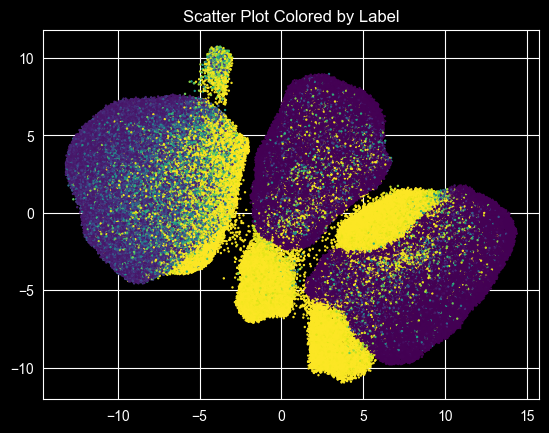

In [10]:
import matplotlib.pyplot as plt


plt.scatter(
    x=adata.obsm['umap'][:, 0],
    y=adata.obsm['umap'][:, 1],
    c=adata.obs['p_doublet'],
    cmap='viridis',  # or another categorical colormap
    s = 0.5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()

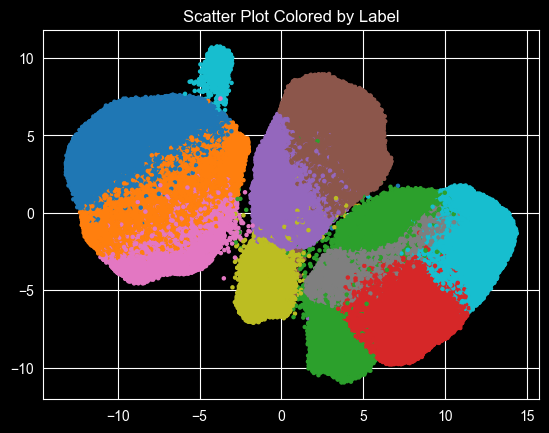

In [11]:
labels = pd.Series(adata.obs['leiden_0.5']).astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap'][:, 0],
    y=adata.obsm['umap'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()

In [12]:
adata.uns

{'SampleName': 'seq101.seq101_1.2025_10_29_12_14_09_out',
 'action_params': {'n_components': 30,
  'sigma': array([[8174.93001508],
         [4971.10143863],
         [3021.85703196],
         [2098.17785055],
         [1824.47329663],
         [1632.99373304],
         [1550.60822625],
         [1419.09283722],
         [1298.66625843],
         [1235.67501357],
         [1180.74792854],
         [1129.52931598],
         [1103.2830204 ],
         [1021.75403598],
         [ 983.03370664],
         [ 956.22667562],
         [ 936.58160357],
         [ 909.76320391],
         [ 877.34757698],
         [ 855.71576222],
         [ 819.75010819],
         [ 818.85266178],
         [ 796.00785647],
         [ 775.01029482],
         [ 768.28752454],
         [ 758.97537124],
         [ 736.61507366],
         [ 723.80036507],
         [ 699.82439534],
         [ 195.27655881]])},
 'colnames_guides': {'guides_neg_0.99': array(['BIRC7_+_61867189', 'EIF2S1_-_67827085', 'KRTAP4-11_-_39274603',